# Base de datos sobre las variaciones porcentuales de los Índices de Precios al Consumidor medidos por INDEC (Instituto Nacional de Estadísticas y Censos) Argentina. 

**OBJETIVO**: Plantear un modelo de clasificación que nos permita saber de forma aproximada si las variaciones en estudio aumentarán o disminuirán respecto del período anterior. En base a los resultados obtenidos se procederá a realizar optimizaciones en caso de necesitarlo.

**Integrantes del grupo**: *Martinez Andres*

**Fuente de datos**: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31

## Tabla de Contenidos

* 1. [Definiciones](#Definiciones)
* 2. [Librerias y datasets](#Librerias_y_datasets)
* 3. [Análisis de datos](#analisis_de_datos)
    * 3.1. [Análisis de los Datasets sujetos de estudio](#analisis_datasets)
        * 3.1.1. [Mapa de Calor](#heatmap)
    * 3.2. [Preparacion de Modelo](#prep_modelos)
    * 3.3. [Filtrado y reordenado de datos](#filtroyreord)
* 4. [Enmascarado de datos](#enmascarado)
    * 4.1. [Unimos nuestros datasets](#union)
* 5. [Aplicación de Algoritmos de Clasificación](#apalgos)
    * 5.1. [Logistic Regression](#logreg)
    * 5.2. [Decision Tree](#decisiontree)
    * 5.3. [Random Forest](#randomforest)
    * 5.4. [Support Vector Machine](#svm)
    * 5.5. [XGBoost](#xgboost)
* 6. [Comparación de Resultados](#compresult)
    * 6.1. [Conclusiones](#conclu1)
* 7. [Optimizaciones](#optimizaciones)
    * 7.1. [GridSearchCV](#grid)
    * 7.2. [RandomSearchCV](#random)
* 8. [Conclusiones Finales](#conclu2)

## Definiciones<a class="anchor" id="Definiciones"></a>

*El Índice de Precios al Consumidor* es un indicador que mide la evolución promedio de los precios de un conjunto de bienes y servicios representativos del gasto de consumo de los hogares residentes en un área determinada.

La representación del gasto de los hogares se elabora con base en la Encuesta Nacional de Gastos de los Hogares (ENGH). Se realiza en todo el país en el período de tres meses, donde se consulta por consumos e ingresos a 45.326 hogares representativos seleccionados mediate métodos estadísticos.

Así se llega a definir la **Canasta del IPC**, que contiene aquellos productos y servicios más representativos del gasto del conjunto de los hogares.

**Composición del Gasto**:

1. Alimentos y Bebidas: todos los alimentos y bebidas (Alcohólicas y no alcohólicas) adquiridos para consumir dentro y fuera del hogar.
2. Indumentaria: vestimenta interior y exterior, calzado y accesorios para hombre mujeres y niños. Servicio de reparación de vestimenta y calzado.
3. Vivienda y Servicios básicos: alquileres, gastos comunes y reparaciones; combustibles, agua y electricidad.
4. Equipamiento y mantenimiento del hogar: muebles, electrodomésticos, vajilla, blanco y mantelería, art. de limpieza y herramientas, ss de repaciones, tintorería, lavadero y ss doméstico.
5. Atención médica y gastos para la salud: medicamentos y accesorios terapéuticos, ss de salud, consultas médicas, odontológicas, análisis clínicos y radiológicos.
6. Transporte y comunicaciones: compra-venta de vehículos particulares y gastos de funcionamiento y mantenimiento, transporte público, correo y teléfono.
7. Esparcimiento: turismo, equipos de audio, TV, video y computación, espectáculos deportivos, cine, teatro, conciertos, ...
8. Educación: cuotas para la educación formal y no formal, textos y útiles escolares.

**Rutina de seguimiento de precios**

Todos los días hábiles, mes a mes, los encuestadores relevan los precios de los bienes y servicios que integran la canasta del IPC.

**Cálculo de la variación de precios**

Obtenido el período de referencia -base del índice-, mensualmente se siguen relevando los precios de los mismos bienes y servicios que integran la canasta IPC, y se observa su evolución en el tiempo. Se compara producto por producto, mes a mes; y de sus variaciones con respecto al período base se obtiene un número índice.

 **Actualización**: Se agrega a la fuente de datos original, información complementaria respecto a las variaciones en los índices del IPC para el mes de Enero 2022. Dicha información será usada como variable 'target' para el entrenamiento de los modelos propuestos.

Fuente de datos: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31 (Actualización de Enero 22).

## Librerias y datasets<a class="anchor" id="Librerias_y_datasets"></a>

In [1]:
# Importamos las librerias que vamos a utilizar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Se agrega información respecto de los índices de Enero 2022, será la variable 'target'

#Lectura del dataframe
df1 = pd.read_csv('C:\\Users\\Andres\\Downloads\\IPC_Modificado.csv')
df2 = pd.read_csv('C:\\Users\\Andres\\Downloads\\IPC_Modificado_Enero22.csv')

## Análisis de los datos<a class="anchor" id="analisis_de_datos"></a>

### Hacemos un análisis de los Datasets sujetos de estudio<a class="anchor" id="analisis_datasets"></a>

In [3]:
# Hacemos un primer EDA del DF
df1.head()

,Region,Fecha,Alimentos _y_bebidas_no_alcohólicas,Alimentos,Pan_y_cereales,Carnes_y_derivados,Leche_productos_lácteos_y_huevos,Aceites_grasas_y_manteca,Frutas,Verduras_tubérculos_y_legumbres,...,Comunicación,Servicios_de_telefonía_e_internet,Recreación_y_cultura,Servicios_recreativos_y_culturales,Periódicos_diarios_revistas_libros_y_artículos_de_papelería,Educación,Restaurantes_y_hoteles,Restaurantes_y_comidas_fuera_del_hogar,Bienes_y_servicios_varios,Cuidado_personal
0,Región GBA,1/1/2017,1.3,1.3,1.5,-1.1,2.2,1.7,3.6,4.7,...,3.8,3.9,3.2,4.0,2.4,0.5,3.3,2.3,2.1,1.5
1,Región GBA,2/1/2017,1.8,2.0,2.2,0.0,3.1,1.3,1.0,6.9,...,4.1,4.3,0.1,1.3,2.4,4.4,1.8,1.9,2.0,1.9
2,Región GBA,3/1/2017,3.5,3.7,2.8,5.4,2.6,1.9,-2.2,7.7,...,2.4,2.5,1.4,2.7,0.8,6.7,1.0,1.9,1.4,1.5
3,Región GBA,4/1/2017,2.3,2.3,2.1,2.5,5.3,2.6,-2.9,0.8,...,6.8,6.9,3.4,6.5,0.8,3.9,2.0,2.2,1.9,2.0
4,Región GBA,5/1/2017,1.1,1.0,0.9,1.0,2.4,-0.1,3.7,-2.2,...,0.0,0.0,0.9,1.9,2.8,1.9,1.0,1.2,1.4,1.3


In [4]:
df2

,Region,Fecha,Alimentos _y_bebidas_no_alcohólicas,Alimentos,Pan_y_cereales,Carnes_y_derivados,Leche_productos_lácteos_y_huevos,Aceites_grasas_y_manteca,Frutas,Verduras_tubérculos_y_legumbres,...,Comunicación,Servicios_de_telefonía_e_internet,Recreación_y_cultura,Servicios_recreativos_y_culturales,Periódicos_diarios_revistas_libros_y_artículos_de_papelería,Educación,Restaurantes_y_hoteles,Restaurantes_y_comidas_fuera_del_hogar,Bienes_y_servicios_varios,Cuidado_personal
0,Región Cuyo,1/1/2022,4.2,4.3,2.8,1.9,3.5,7.7,6.2,18.3,...,7.3,7.9,5.6,8.3,5.4,0.9,8.7,6.9,3.6,3.5


In [5]:
# Analizamos el shape de los dataframes
print(df1.shape)
print(df2.shape)

(360, 44)
(1, 44)


In [6]:
# Analizamos la totalidad de registros por columnas de los dataframes
df1.count()

Region                                                         360
Fecha                                                          360
Alimentos _y_bebidas_no_alcohólicas                            360
Alimentos                                                      360
Pan_y_cereales                                                 360
Carnes_y_derivados                                             360
Leche_productos_lácteos_y_huevos                               360
Aceites_grasas_y_manteca                                       360
Frutas                                                         360
Verduras_tubérculos_y_legumbres                                360
Azúcar_dulces_chocolate_golosinas_etc                          360
Bebidas_no_alcohólicas                                         360
Café_té_yerba_y_cacao                                          360
Aguas_minerales_bebidas_gaseosas_y_jugos                       360
Bebidas_alcohólicas_y_tabaco                                  

In [7]:
df2.count()

Region                                                         1
Fecha                                                          1
Alimentos _y_bebidas_no_alcohólicas                            1
Alimentos                                                      1
Pan_y_cereales                                                 1
Carnes_y_derivados                                             1
Leche_productos_lácteos_y_huevos                               1
Aceites_grasas_y_manteca                                       1
Frutas                                                         1
Verduras_tubérculos_y_legumbres                                1
Azúcar_dulces_chocolate_golosinas_etc                          1
Bebidas_no_alcohólicas                                         1
Café_té_yerba_y_cacao                                          1
Aguas_minerales_bebidas_gaseosas_y_jugos                       1
Bebidas_alcohólicas_y_tabaco                                   1
Bebidas_alcohólicas      

In [8]:
# Inspeccionamos los tipos de datos de cada columna
df1.dtypes

Region                                                          object
Fecha                                                           object
Alimentos _y_bebidas_no_alcohólicas                            float64
Alimentos                                                      float64
Pan_y_cereales                                                 float64
Carnes_y_derivados                                             float64
Leche_productos_lácteos_y_huevos                               float64
Aceites_grasas_y_manteca                                       float64
Frutas                                                         float64
Verduras_tubérculos_y_legumbres                                float64
Azúcar_dulces_chocolate_golosinas_etc                          float64
Bebidas_no_alcohólicas                                         float64
Café_té_yerba_y_cacao                                          float64
Aguas_minerales_bebidas_gaseosas_y_jugos                       float64
Bebida

In [9]:
df2.dtypes

Region                                                          object
Fecha                                                           object
Alimentos _y_bebidas_no_alcohólicas                            float64
Alimentos                                                      float64
Pan_y_cereales                                                 float64
Carnes_y_derivados                                             float64
Leche_productos_lácteos_y_huevos                               float64
Aceites_grasas_y_manteca                                       float64
Frutas                                                         float64
Verduras_tubérculos_y_legumbres                                float64
Azúcar_dulces_chocolate_golosinas_etc                          float64
Bebidas_no_alcohólicas                                         float64
Café_té_yerba_y_cacao                                          float64
Aguas_minerales_bebidas_gaseosas_y_jugos                       float64
Bebida

In [10]:
# Analizamos las principales medidas estadisticas para el dataframe principal
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Alimentos _y_bebidas_no_alcohólicas,360.0,3.086389,1.611694,0.3,1.800,2.90,4.000,9.1
Alimentos,360.0,3.110000,1.697814,0.2,1.800,2.90,4.100,9.6
Pan_y_cereales,360.0,2.951944,1.899053,-1.5,1.800,2.60,3.500,13.4
Carnes_y_derivados,360.0,3.317222,3.079600,-1.4,1.200,2.60,4.400,20.5
Leche_productos_lácteos_y_huevos,360.0,3.086111,2.111469,-2.8,1.600,2.65,4.200,9.7
Aceites_grasas_y_manteca,360.0,3.252500,2.701603,-2.3,1.375,2.70,4.725,15.9
Frutas,360.0,3.151667,4.859043,-10.5,0.100,2.65,5.825,27.5
Verduras_tubérculos_y_legumbres,360.0,2.932222,5.892379,-16.6,-1.025,2.75,6.925,21.9
Azúcar_dulces_chocolate_golosinas_etc,360.0,3.008889,1.712311,-0.4,1.775,2.70,4.000,10.1
Bebidas_no_alcohólicas,360.0,2.916389,1.577588,-2.0,1.875,2.80,3.725,9.9


#### Realizamos un mapa de calor. A partir del cual, podemos obtener información de manera mas rápida y realizar un análisis de la correlación existente entre las features en obsevación. <a class="anchor" id="heatmap"></a>

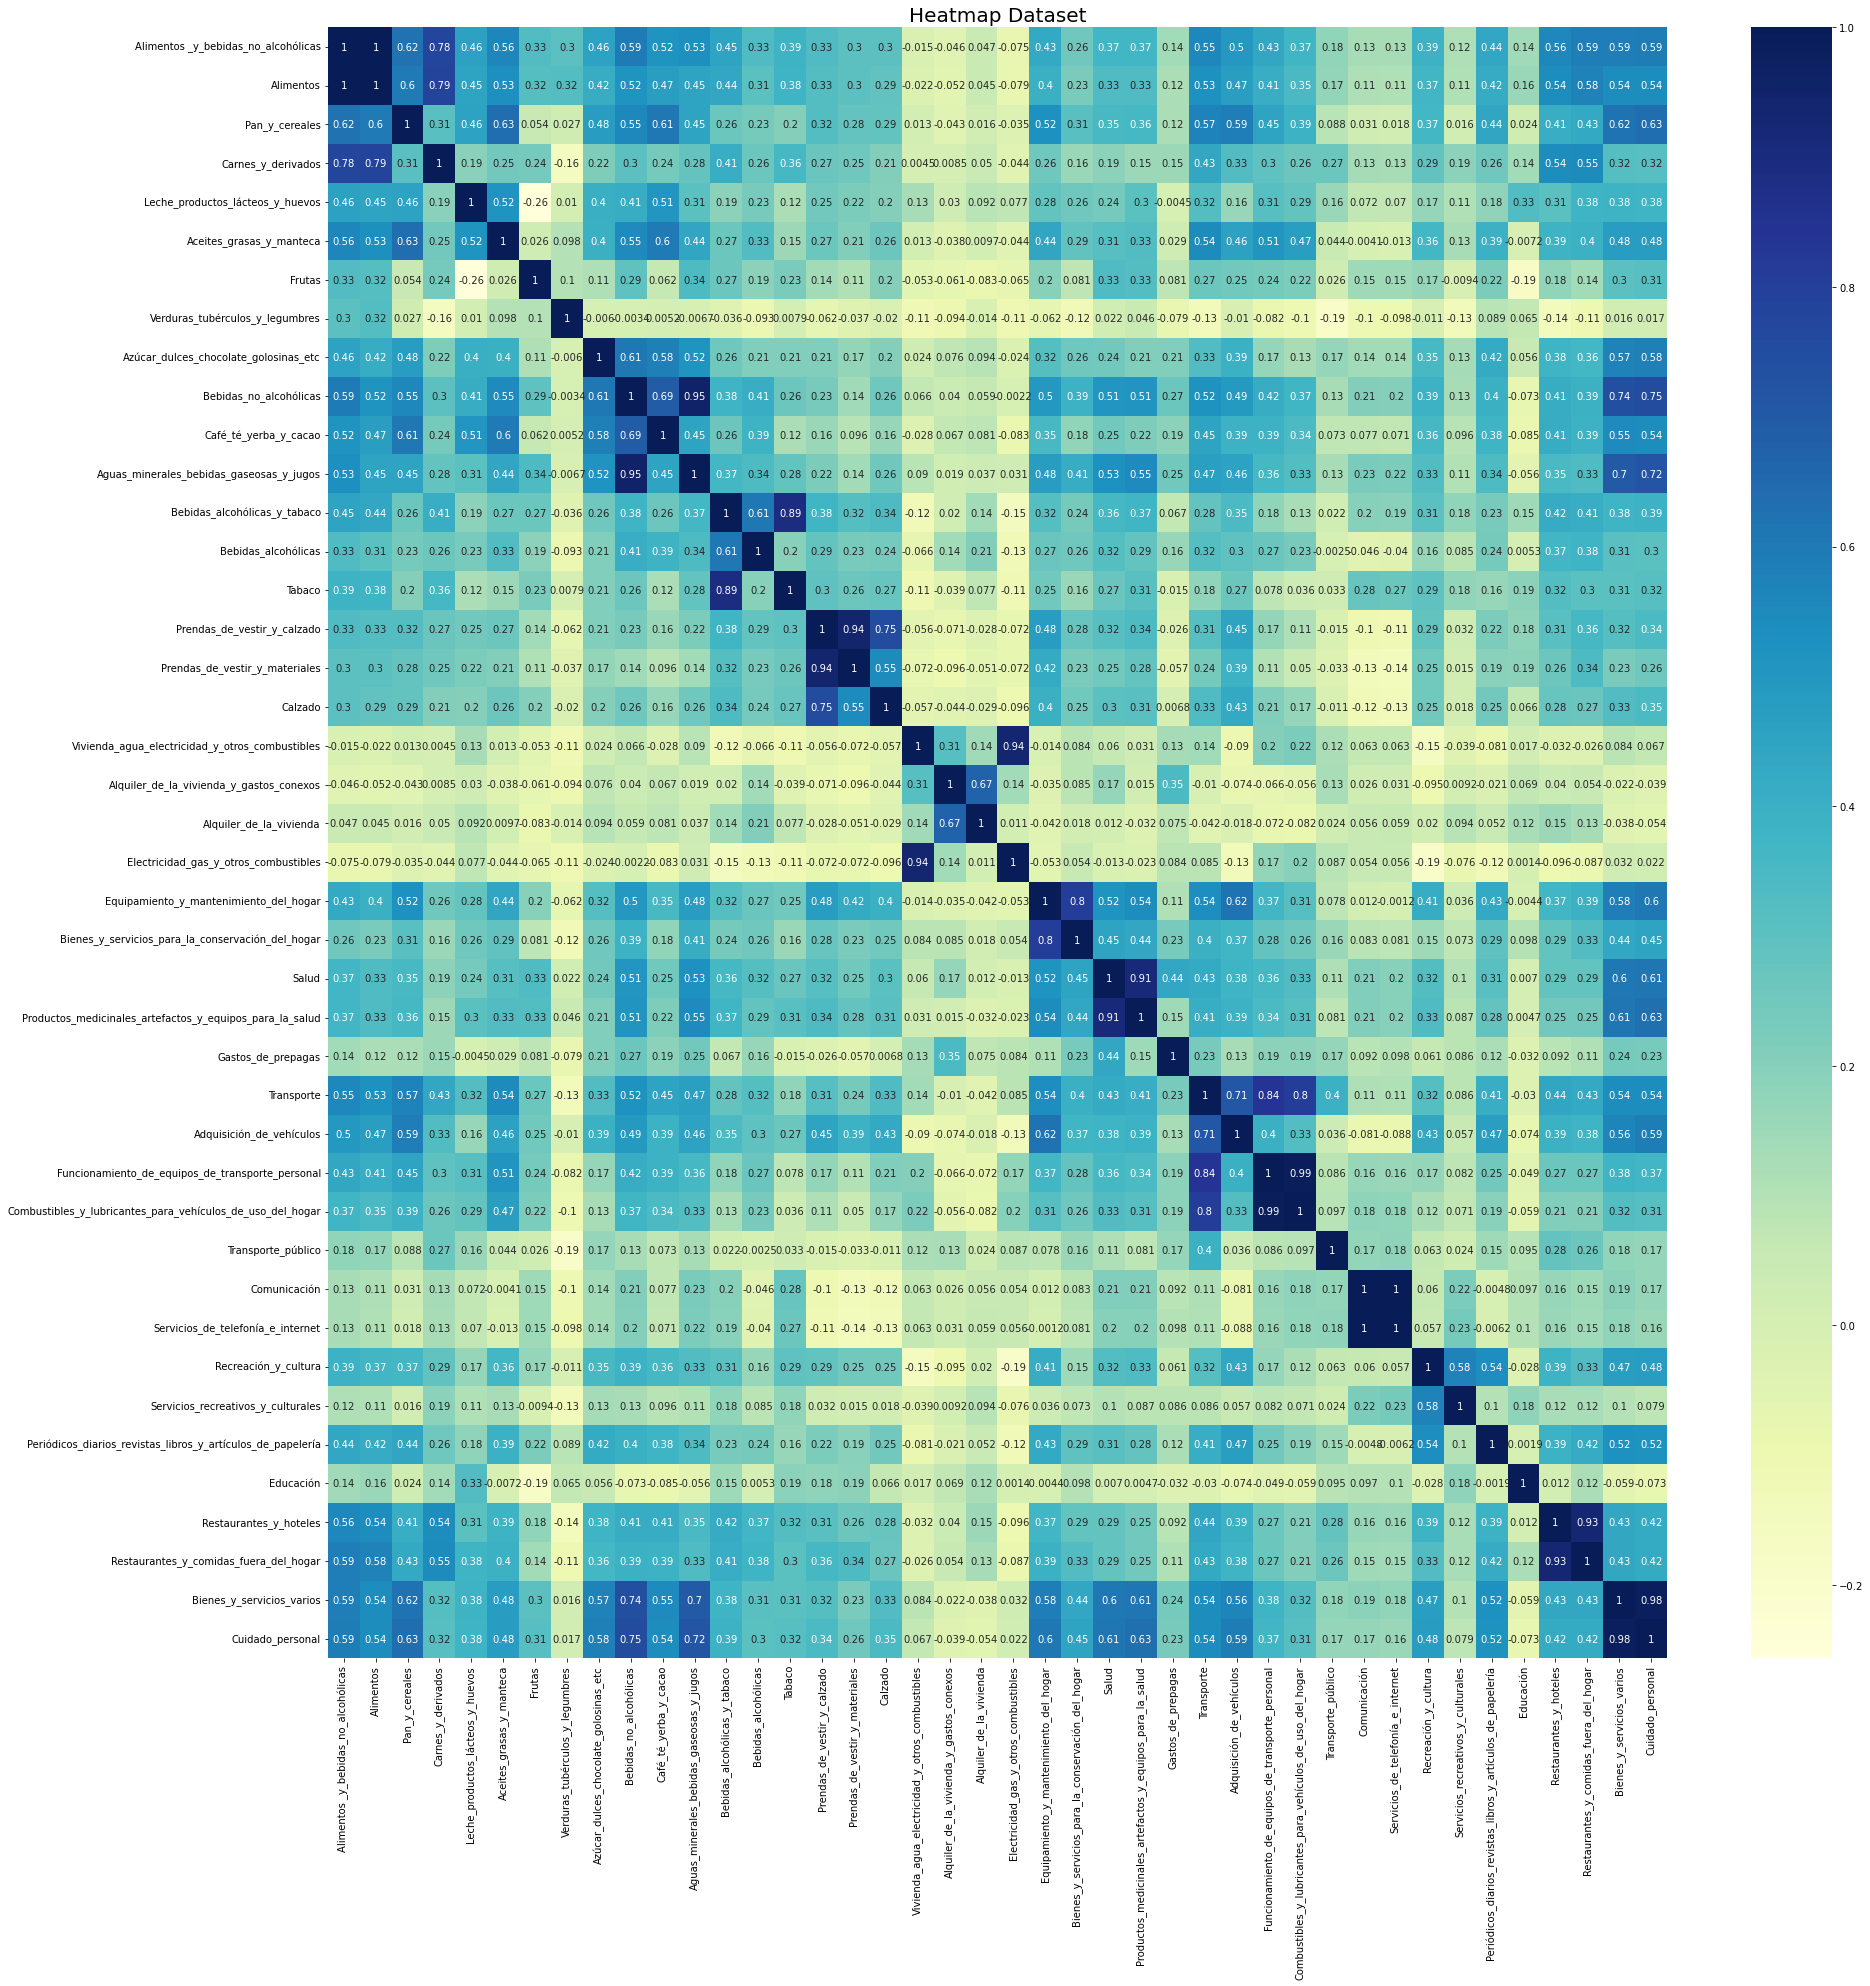

In [11]:
# Hacemos un HeatMap del Dataframe

## probar cmap = 'vlag'

plt.rcParams['figure.figsize'] = (30, 30)

sns.heatmap(df1.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Heatmap Dataset', fontsize = 20)
plt.show()

Las correlaciones más fuertes las observamos en categorías pertenecientes a rubros que contienen elementos de la canasta básica similares. Esto quiere decir, que las variaciones porcentuales en los precios de los mismos guardarán alta correlativdad (por encima del 80%). Algunos de los ejemplos que podemos citar son: 

- Aguas minerales, aguas gaseosas y jugos - Bebidas no alcohólicas
- Tabaco - Bebidas alcohólicas y tabaco
- Electricidad, gas y otros combustibles - Vivienda, agua, gas y otros combustibles
- Bienes y servicios para la conservación del hogar - Equipamiento y mantenimiento del hogar
- Productos medicinales, artefactos y equipos para la salud - Salud
- Bienes y servicios varios - Cuidado personal

Para el resto de las caracteristicas observadas, vemos que las correlaciones no son mayores al 60%. Se puede concluir entonces, que no existe una variable o característica que provoque variaciones significativas sobre el resto. 

### Preparación de Modelos.<a class="anchor" id="prep_modelos"></a>

**Objetivos:** En esta sección el objetivo será transformar nuestros datasets para poder realizar un análisis de los mismos. Primero filtraremos para realizar los modelos sobre la información dispobible para la *Región Cuyo*. Luego, realizaremos diferentes modelos de clasificación, para predecir futuras salidas. (Tomamos como ejemplo la Región Cuyo para la generalización del modelo pero, vemos que en general los índices varian en la misma proporción para todas las regiones de Argentina)

### Filtramos y reordenamos nuesrtos datos.<a class="anchor" id="filtroyreord"></a>

In [12]:
# Preparamos el daframe de la variable 'target' y filtramos por Región Cuyo.

ipc2 = df2.copy().transpose()
ipc2 = ipc2.rename(columns = ipc2.iloc[1])
ipc2 = ipc2.drop(["Region", "Fecha"])
ipc2 = ipc2.reset_index()
ipc2 = ipc2.drop(['index'], axis = 1)
ipc2

,1/1/2022
0,4.2
1,4.3
2,2.8
3,1.9
4,3.5
5,7.7
6,6.2
7,18.3
8,5.4
9,3.8


In [13]:
# Filtramos y reordenamos los datos para la Región Cuyo

ipc1 = df1.copy()
ipc1 = ipc1[ipc1['Region'] == 'Región Cuyo']
ipc1 = ipc1.transpose()
ipc1 = ipc1.rename(columns = ipc1.iloc[1])
ipc1 = ipc1.drop(["Region", "Fecha"])
ipc1 = ipc1.reset_index()
ipc1 = ipc1.drop(['index'], axis = 1)
ipc1

,1/1/2017,2/1/2017,3/1/2017,4/1/2017,5/1/2017,6/1/2017,7/1/2017,8/1/2017,9/1/2017,10/1/2017,...,3/1/2021,4/1/2021,5/1/2021,6/1/2021,7/1/2021,8/1/2021,9/1/2021,10/1/2021,11/1/2021,12/1/2021
0,1.5,1.8,2.3,2.9,1.7,0.6,1.2,2.2,1.9,1.7,...,4.3,4.6,3.4,3.9,3.3,1.1,2.4,2.5,2.7,4.4
1,1.2,1.7,2.4,3.1,1.8,0.5,1.2,2.3,2.0,1.6,...,4.4,4.7,3.5,4.0,3.2,0.9,2.3,2.5,2.8,4.6
2,1.7,1.7,2.6,4.1,-0.2,1.3,1.2,1.7,0.9,1.8,...,5.0,4.6,4.1,3.6,2.9,2.5,2.4,2.4,2.3,3.3
3,0.1,0.0,2.5,3.3,0.8,0.2,1.8,1.0,1.8,0.8,...,5.8,4.5,3.7,5.5,0.8,0.1,0.6,0.6,5.4,10.7
4,2.1,2.7,3.0,4.2,2.6,2.5,2.5,0.9,0.0,0.7,...,6.7,8.8,5.6,4.8,5.0,4.1,2.2,2.4,1.2,2.8
5,4.4,7.3,-0.7,-0.2,-1.8,-0.2,1.7,1.8,1.7,0.5,...,5.3,7.3,5.7,5.5,3.8,2.1,0.8,-0.7,0.7,2.1
6,2.9,0.6,-2.4,-1.6,1.0,-0.5,-0.1,2.0,2.7,6.6,...,-5.3,-1.4,-3.6,-6.9,-1.4,1.0,9.0,6.7,4.6,3.9
7,0.4,5.3,3.8,3.9,8.7,-2.8,-1.8,9.7,6.8,3.5,...,0.7,2.4,1.9,2.5,13.0,-5.2,6.2,8.5,-2.7,-12.1
8,2.7,0.9,3.0,1.9,0.0,4.6,0.0,1.3,2.0,1.7,...,2.7,4.1,3.3,0.9,3.0,3.5,3.4,4.6,2.7,2.0
9,4.1,2.7,1.3,1.2,1.6,0.8,1.5,1.8,0.8,2.1,...,2.9,3.9,2.6,3.1,3.9,4.1,3.8,2.9,1.5,2.8


In [14]:
# Transformamos los datos a tipo 'float'

ipc1 = ipc1.astype(float)

In [15]:
# Corroboramos los que los datos hayan cambiado para realizar las operaciones correspondientes
ipc1.dtypes

1/1/2017     float64
2/1/2017     float64
3/1/2017     float64
4/1/2017     float64
5/1/2017     float64
6/1/2017     float64
7/1/2017     float64
8/1/2017     float64
9/1/2017     float64
10/1/2017    float64
11/1/2017    float64
12/1/2017    float64
1/1/2018     float64
2/1/2018     float64
3/1/2018     float64
4/1/2018     float64
5/1/2018     float64
6/1/2018     float64
7/1/2018     float64
8/1/2018     float64
9/1/2018     float64
10/1/2018    float64
11/1/2018    float64
12/1/2018    float64
1/1/2019     float64
2/1/2019     float64
3/1/2019     float64
4/1/2019     float64
5/1/2019     float64
6/1/2019     float64
7/1/2019     float64
8/1/2019     float64
9/1/2019     float64
10/1/2019    float64
11/1/2019    float64
12/1/2019    float64
1/1/2020     float64
2/1/2020     float64
3/1/2020     float64
4/1/2020     float64
5/1/2020     float64
6/1/2020     float64
7/1/2020     float64
8/1/2020     float64
9/1/2020     float64
10/1/2020    float64
11/1/2020    float64
12/1/2020    

## Enmascarado de datos.<a class="anchor" id="enmascarado"></a>

Transformamos los datos del dataset 'ipc2' comparándolo con los datos del mes anterior a la que pertenecen dichos datos (ubicados en el dataset 'ipc1'). Para ello decimos, que cuando la variable sufrió un *aumento*, el valor correspondiente será igual a '1'. Para el caso en que la variable *disminuyó* respecto del mes anterior, el valor correspondiente será '0'.

In [16]:
# Transformamos el set de datos 'ipc2' y la renombramos a 'target'

ipc2['target'] = np.where(ipc1['12/1/2021'].shift() <= ipc2['1/1/2022'], "1","0")

# Eliminamos la columna transformada
ipc2 = ipc2.drop(['1/1/2022'], axis = 1)

# Visualizamos la variable 'target'
ipc2['target']

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    0
22    1
23    0
24    0
25    1
26    1
27    1
28    1
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    1
37    0
38    1
39    1
40    0
41    0
Name: target, dtype: object

In [17]:
# Para poder realizar correctamente los modelos, transformamos nuevamente los datos de 'ipc2'
ipc2 = ipc2.astype(int)

In [18]:
# Corroboramos
ipc2.dtypes

target    int32
dtype: object

### Unimos nuestros datasets<a class="anchor" id="union"></a>

In [19]:
# Concatenamos nuestros dataset en un mismo dataframe

ipc3 = pd.concat([ipc1, ipc2], axis = 1)

## Aplicación de Algoritmos de Clasificación<a class="anchor" id="apalgos"></a>

Procederemos con la aplicación de distintos algoritmos de clasificación para luego realizar un analisis de sus estimaciones. Como se aclaró anteriormente, utilizamos un nuevo data set disponible para estimar los valores a predecir. Este nuevo dataset, será la variblae 'target'. Tendremos en cuenta que para la realizacion de los mismos, la cantidad de datos se ha reducido significativamente debido a la predisposición original de los datos.

***Objetivos: Logistic Regression - Decision Tree - Random Forest - Support Vector Machines - XGBoost***

### Logistic Regression<a class="anchor" id="logreg"></a>

In [20]:
# Entrenamos un modelo de regresión logística
## Importamos las clases a utilizar

from sklearn.linear_model import LogisticRegression

In [21]:
# Seleccionamos las features

## Features
X = ipc3.iloc[:,:-1]
## Target variable
y = ipc3.target

In [22]:
# Dividimos X e y en los set de train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 44)

In [23]:
# Iniciamos el modelo
clfLR = LogisticRegression()

# Entrenamos el modelo
clfLR.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Realizamos las predicciones
y_pred_LR = clfLR.predict(X_test)
print(y_pred_LR)

[0 1 1 0 1 0 1 0 0 1 1 0 1]


In [25]:
# Comparamos las salidas
df_predict = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_LR})
df_predict

,Actual,Predicted
40,0,0
5,1,1
11,1,1
15,0,0
24,0,1
12,0,0
16,0,1
29,0,0
18,0,0
34,1,1


In [26]:
# Importamos la clase de metricas de la libreria sklearn
from sklearn import metrics


## Evaluamos el modelo con las metricas de accuracy, precision y recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_LR))
print('Precision:', metrics.precision_score(y_test, y_pred_LR))
print('Recall:', metrics.recall_score(y_test, y_pred_LR))

Accuracy: 0.8461538461538461
Precision: 0.7142857142857143
Recall: 1.0


In [27]:
# Realizamos una matriz de confusión sobre nuestras predicciones
from sklearn import metrics
matriz_confusion = metrics.confusion_matrix(y_test, y_pred_LR)
matriz_confusion

array([[6, 2],
       [0, 5]], dtype=int64)

[[6 2]
 [0 5]]


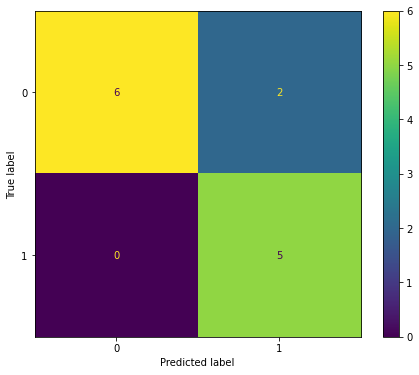

In [28]:
# Graficamos la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_pred_LR))
plt.rcParams['figure.figsize'] = (8, 6)
plot_confusion_matrix(clfLR, X_test, y_test)
plt.show()

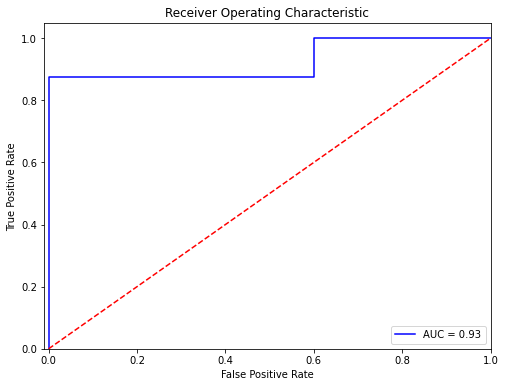

In [29]:
# Graficamos la curva AUC
predictionLR = clfLR.predict_proba(X_test)[:,:1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictionLR, pos_label=0)
AUCLR = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCLR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

### Decision Tree<a class="anchor" id="decisiontree"></a>

In [30]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

In [31]:
clfTree = DecisionTreeClassifier(random_state = 14)
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=14)

In [32]:
y_pred_DT = clfTree.predict(X_test)
y_pred_DT

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [33]:
## Evaluamos el modelo con las metricas de accuracy, precision y recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_DT))
print('Precision:', metrics.precision_score(y_test, y_pred_DT))
print('Recall:', metrics.recall_score(y_test, y_pred_DT))

Accuracy: 0.6923076923076923
Precision: 0.8
Recall: 0.5714285714285714


[[5 1]
 [3 4]]


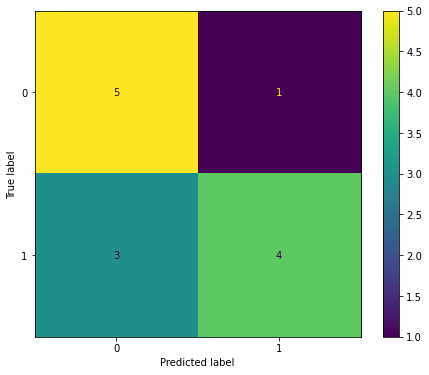

In [34]:
print(confusion_matrix(y_test, y_pred_DT))
plt.rcParams['figure.figsize'] = (8, 6)
plot_confusion_matrix(clfTree, X_test, y_test)
plt.show()

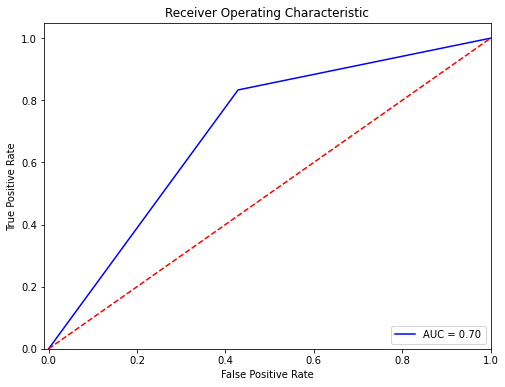

In [35]:
from sklearn import metrics
predictionTree = clfTree.predict_proba(X_test)[:, 0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictionTree, pos_label=0)
AUCTree = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest<a class="anchor" id="randomforest"></a>

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_pred_RF = clfRF.predict(X_test)
y_pred_RF

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [38]:
from sklearn import metrics
matriz_confusion = metrics.confusion_matrix(y_test, y_pred_RF)
matriz_confusion

array([[6, 0],
       [2, 5]], dtype=int64)

[[6 0]
 [2 5]]


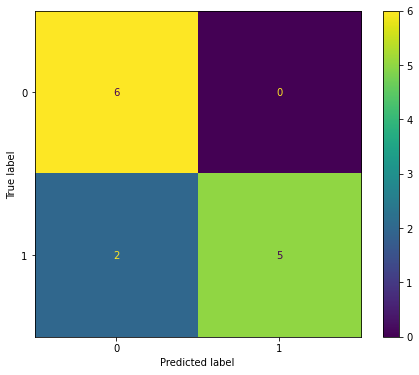

In [39]:
print(confusion_matrix(y_test, y_pred_RF))
plt.rcParams['figure.figsize'] = (8, 6)
plot_confusion_matrix(clfRF, X_test, y_test)
plt.show()

In [40]:
## Evaluamos el modelo con las metricas de accuracy, precision y recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_RF))
print('Precision:', metrics.precision_score(y_test, y_pred_RF))
print('Recall:', metrics.recall_score(y_test, y_pred_RF))

Accuracy: 0.8461538461538461
Precision: 1.0
Recall: 0.7142857142857143


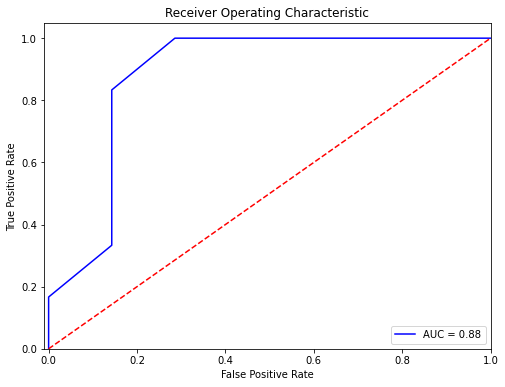

In [41]:
prediccionRF = clfRF.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionRF, pos_label=0)
AUCRF = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine<a class="anchor" id="svc"></a>

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    train_size = 0.7, 
                                                    random_state = 42, 
                                                    shuffle = True)

clfSVM = SVC(C = 100, kernel = 'linear', random_state=123)
clfSVM.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

In [43]:
y_pred_SVM = clfSVM.predict(X_test)

In [44]:
## Evaluamos el modelo con las metricas de accuracy, precision y recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_SVM))
print('Precision:', metrics.precision_score(y_test, y_pred_SVM))
print('Recall:', metrics.recall_score(y_test, y_pred_SVM))

Accuracy: 0.8461538461538461
Precision: 1.0
Recall: 0.7142857142857143


[[6 0]
 [2 5]]


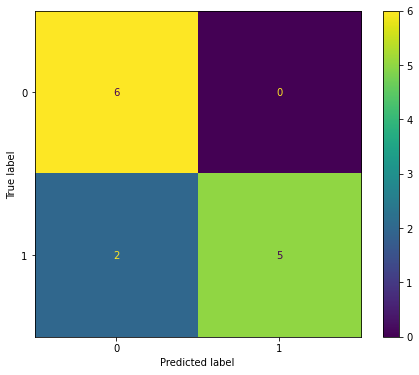

In [45]:
print(confusion_matrix(y_test, y_pred_SVM))
plt.rcParams['figure.figsize'] = (8, 6)
plot_confusion_matrix(clfSVM, X_test, y_test)
plt.show()

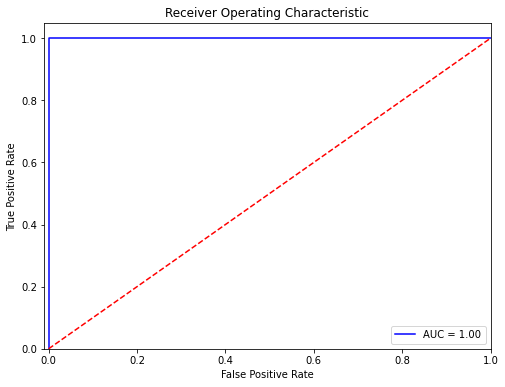

In [46]:
predictionSVM = clfRF.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictionSVM, pos_label=0)
AUCSVM = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCSVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost<a class="anchor" id="xgboost"></a>

In [47]:
# Importamos librerias y dividimos el data set en train y test
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 44)

In [48]:
# Fittiamos el modelo
clfXGB = XGBClassifier(booster='gbtree', 
                       use_label_encoder = False, 
                       max_depth = 30,
                       n_estimators=1000, 
                       random_state = 42)
clfXGB.fit(X_train, y_train)

[18:09:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=30, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [49]:
# Hacemos las predicciones para la data test
y_pred_XGB = clfXGB.predict(X_test)

In [50]:
## Evaluamos el modelo con las metricas de accuracy, precision y recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_XGB))
print('Precision:', metrics.precision_score(y_test, y_pred_XGB))
print('Recall:', metrics.recall_score(y_test, y_pred_XGB))

Accuracy: 0.6923076923076923
Precision: 0.5714285714285714
Recall: 0.8


[[5 3]
 [1 4]]


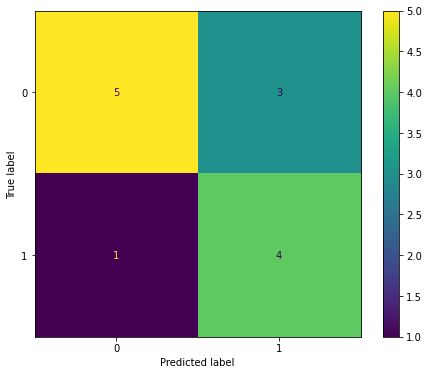

In [51]:
print(confusion_matrix(y_test, y_pred_XGB))
plt.rcParams['figure.figsize'] = (8, 6)
plot_confusion_matrix(clfXGB, X_test, y_test)
plt.show()

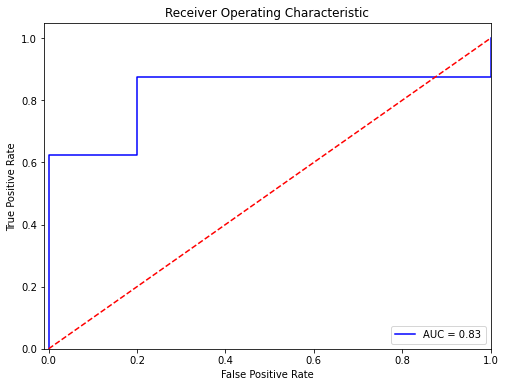

In [52]:
predictionXGB = clfXGB.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictionXGB, pos_label=0)
AUCXGB = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCXGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Comparamos los resultados obtenidos de los modelos.<a class="anchor" id="compresult"></a>

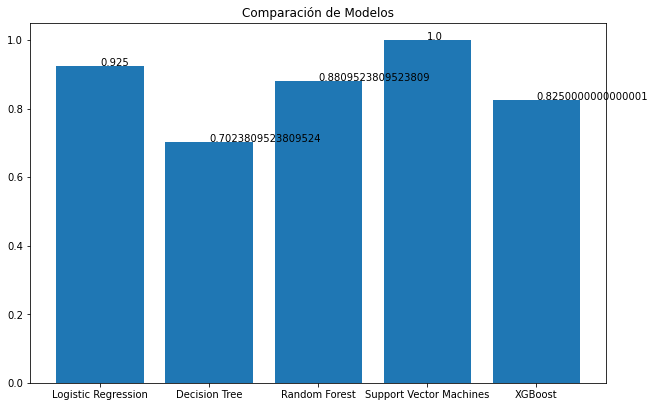

In [53]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Modelos")
ejeX = ['Logistic Regression', 'Decision Tree', 'Random Forest' , 'Support Vector Machines', 'XGBoost']
ejeY = [AUCLR, AUCTree, AUCRF, AUCSVM, AUCXGB]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

### **Conclusiones:** <a class="anchor" id="conclu1"></a>

Según los resultados obtenidos, podemos decir que los modelos que mejor se adaptan a nuestro conjunto de datos son: **Logistic Regression** y el modelo **Random Forest**. Para el caso de **Support Vector Classifier** encontramos que la cantidad de datos utilizados para el set de prueba es muy pequeño, es por eso que, el modelo arroja una coincidencia del 100% en las probabilidades predichas. Para el caso de **XGBoost** vemos que la curva ROC nos indica, que en el 83% de las veces el modelo predice mejor que la asignación aleatoria.

Por lo anterior descrito, concluimos que hay modelos que se adaptan mejor a la cantidad de datos tomados para muestra y prueba mientras que otros, deberia ser eliminados o manipular de forma eficiente el set de datos para no incurrir en errores graves.

## Optimizaciones<a class="anchor" id="optimizaciones"></a>

**Objetivos:** En esta sección utilizaremos algunas tecnicas para optimizar las salidas obtenidas en los casos en que los resultados no han sido satisfactorios.

Para ello, utilizaremos las tecnicas de *GridSearchCV* y *RandomizedSearchCV* disponibles en la libreria de SciKitlearn.

In [54]:
# Comenzamos definiendo nuestro dataframe e iremos colocando y comparando nuestras salidas.

cols = ['Optimizer', 'LogisticReg', 'DecisionTree', 'RandomForest', 'SVM', 'XGBoost']
resultados = pd.DataFrame(columns = cols)
resultados.set_index('Optimizer', inplace = True)
resultados.loc['Standard'] = [0, 0, 0, 0, 0]
resultados.loc['GridSearchCV'] = [0, 0, 0, 0, 0]
resultados.loc['RadonmizedSearchCV'] = [0, 0, 0, 0, 0]
resultados

,LogisticReg,DecisionTree,RandomForest,SVM,XGBoost
Optimizer,,,,,
Standard,0,0,0,0,0
GridSearchCV,0,0,0,0,0
RadonmizedSearchCV,0,0,0,0,0


In [55]:
# Colocamos los valores obtenidos

## Scores
scoreLR = metrics.accuracy_score(y_test, y_pred_LR)
scoreDT = metrics.accuracy_score(y_test, y_pred_DT)
scoreRF = metrics.accuracy_score(y_test, y_pred_RF)
scoreSVM = metrics.accuracy_score(y_test, y_pred_SVM)
scoreXGB = metrics.accuracy_score(y_test, y_pred_XGB)

resultados.iloc[0,:] = [scoreLR, scoreDT, scoreRF, scoreSVM, scoreXGB]
resultados

,LogisticReg,DecisionTree,RandomForest,SVM,XGBoost
Optimizer,,,,,
Standard,0.846154,0.538462,0.538462,0.692308,0.692308
GridSearchCV,0,0,0,0,0
RadonmizedSearchCV,0,0,0,0,0


### Aplicamos GridSearchCV<a class="anchor" id="grid"></a>

In [58]:
# Cargamos librerias necesarias y configuramos los parámetros para GridSearchCV

from sklearn.model_selection import GridSearchCV

## Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers, penalty=penalty, C=c_values)

## Decision Tree
criterion = ['gini','entropy']
#max_depht = [3, 5, 7, 10, 20]
dt_grid = dict(criterion=criterion)#, max_depht=max_depht)


## RandomForest
n_estimators = [10, 100, 1000, 10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators, max_features=max_features)

## SVC
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel, C=C, gamma=gamma)

## XGBoost
min_child_weight = [1,5,10]
gamma = [0.5,1,1.5,2,5]
subsample = [0.6,0.8,1.0]
colsample_bytree = [0.6,0.8,1.0]
max_depth = [3,4,5]
xgb_grid = dict(min_child_weight=min_child_weight,gamma=gamma,subsample=subsample,
                colsample_bytree=colsample_bytree,max_depth=max_depth)

In [57]:
models = [clfLR, clfTree, clfRF, clfSVM, clfXGB]
grids = [lr_grid, dt_grid, rf_grid, svc_grid, xgb_grid]
col = 0

for i in range (0, len(models)):
    grid_search = GridSearchCV(estimator=models[col],
                              param_grid=grids[col], n_jobs=-1, cv=5,
                              scoring='accuracy', error_score=0)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    resultados.iloc[1, col] = grid_clf_acc.score(X_test, y_test)
    col += 1
resultados

[18:15:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,LogisticReg,DecisionTree,RandomForest,SVM,XGBoost
Optimizer,,,,,
Standard,0.846154,0.538462,0.538462,0.692308,0.692308
GridSearchCV,0.769231,0.692308,0.769231,0.846154,0.769231
RadonmizedSearchCV,0,0,0,0,0


**CONCLUSIONES:** Vemos que para este primer algoritmo de optimización, cuatro de los cinco modelos planteados sufren una mejor en sus métricas de precisión. Por tanto concluimos que en este caso, solo el modelo SVM es satisfactorio.

### Aplicamos RandomSearchCV<a class="anchor" id="random"></a>

In [63]:
# Cargamos las librerias necesarias para RandomSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [64]:
col = 0
for i in range (0, len(models)):
    n_iter_search = 3
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    random_search = RandomizedSearchCV(estimator=models[col],
                              param_distributions=grids[col], n_iter=n_iter_search, cv=cv,
                              scoring='accuracy', error_score=0)
    random_search.fit(X_train, y_train)
    resultados.iloc[2, col] = random_search.score(X_test, y_test)
    col += 1
resultados

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[18:41:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[18:41:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[18:42:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,LogisticReg,DecisionTree,RandomForest,SVM,XGBoost
Optimizer,,,,,
Standard,0.846154,0.538462,0.538462,0.692308,0.692308
GridSearchCV,0.769231,0.692308,0.769231,0.846154,0.769231
RadonmizedSearchCV,0.769231,0.692308,0.846154,0.846154,0.384615


**CONCLUSIONES:** Para este caso, vemos que dos de los modelos presentan métricas que pueden ser satisfactorias para un análisis de clasificación. En ambos casos de optimización, se muestra un claro déficit de información para las muestras tomadas para entrenamiento y prueba.

## Conclusiones Finales<a class="anchor" id="conclu2"></a>

Podemos observar luego de realizar las optimizaciones mencionadas anteriormente que, en algunos casos la comparación entre las metricas de 'accuracy' mejora en cierta proporcion, para otros casos permanece invarible y para otros la métrica empeora. A partir de estas observaciones podemos decir que, contamos con dos modelos que se adaptan a nuestros datos y las salidas obtenidas se encuentran en un rango de 'aceptable'. Estos son: Random Forest con Randomized Search CV y SVM con ambos modelos de optimizaciones.

Cabe destacar, que debido a la disposición original de los datos, debe tenerse especial atención al uso de los mismos. Ya que, modelos mas robustos pueden derivar en errores graves producidos por falta de información. Podemos entonces, en base a un análisis macroeconómico, generalizar las mediciones tomadas en todas las regiones y realizar los modelos con la totalidad de la información sin incurrir en sesgos ni errores de medición.